# **Main**

## **Importing the Compressed File**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip /content/drive/MyDrive/Brain_tumor_dataset.zip -d "/content/Their_Folder"

Archive:  /content/drive/MyDrive/Brain_tumor_dataset.zip
  inflating: /content/Their_Folder/Y1.jpg  
  inflating: /content/Their_Folder/__MACOSX/._Y1.jpg  
  inflating: /content/Their_Folder/Y2.jpg  
  inflating: /content/Their_Folder/__MACOSX/._Y2.jpg  
  inflating: /content/Their_Folder/Y3.jpg  
  inflating: /content/Their_Folder/__MACOSX/._Y3.jpg  
  inflating: /content/Their_Folder/Y4.jpeg  
  inflating: /content/Their_Folder/__MACOSX/._Y4.jpeg  
  inflating: /content/Their_Folder/Y5.jpg  
  inflating: /content/Their_Folder/__MACOSX/._Y5.jpg  
  inflating: /content/Their_Folder/Y6.jpg  
  inflating: /content/Their_Folder/__MACOSX/._Y6.jpg  
  inflating: /content/Their_Folder/Y7.jpeg  
  inflating: /content/Their_Folder/__MACOSX/._Y7.jpeg  
  inflating: /content/Their_Folder/Y8.jpg  
  inflating: /content/Their_Folder/__MACOSX/._Y8.jpg  
  inflating: /content/Their_Folder/Y9.jpeg  
  inflating: /content/Their_Folder/__MACOSX/._Y9.jpeg  
  inflating: /content/Their_Folder/Y10.jpg  
 

In [ ]:
!mkdir '/content/Augmented_Manually'

In [ ]:
Manual_Augmented_Dir = "/content/Augmented_Manually"

# **Importing Libraries**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os
import glob
from PIL import Image

## **Adding Image Paths**



In [ ]:
dir = "/content/Their_Folder/"
image_paths = []
for image_path in os.listdir("/content/Their_Folder"):
    if  (image_path.lower()).endswith((".jpeg",".jpg")):
        image_paths.append((dir+image_path))


## **Un-Useful Way Shouldn't be used**

In [ ]:
image_paths = []
extension = "jpeg"
dir = "/content/Their_Folder/"
x = ("/content/Their_Folder/y10jpeg").lower() #unwanted

for image_path in os.listdir("/content/Their_Folder"):
     if   image_path.lower().startswith("y10") : #Y10.jpeg
        image_num_10 = image_path[0:4]
        image_paths.append(dir + image_num_10 + extension)
     if  image_path.lower().endswith((".jpg", ".jpeg")):  #Y5.jpg
        new_image = image_path[0:3]
        image_paths.append(dir + new_image + extension)
     if  image_path.lower().startswith("y10"):
        image_paths.remove("/content/Their_Folder/Y10jpeg")


print(f"Num Of Detected Images  with .jpeg Extension  -> {len(image_paths)}")
#print(image_paths[])

Num Of Detected Images  with .jpeg Extension  -> 10


## **Displaying Image Paths**

In [ ]:
for image in image_paths:
    print(image)

/content/Their_Folder/Y7.jpeg
/content/Their_Folder/Y8.jpg
/content/Their_Folder/Y4.jpeg
/content/Their_Folder/Y3.jpg
/content/Their_Folder/Y10.jpg
/content/Their_Folder/Y6.jpg
/content/Their_Folder/Y5.jpg
/content/Their_Folder/Y2.jpg
/content/Their_Folder/Y9.jpeg
/content/Their_Folder/Y1.jpg


## **Ceck if Images are read all**

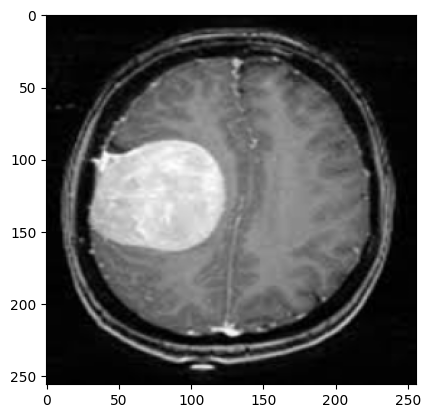

In [ ]:
x = cv2.imread("/content/Their_Folder/Y1.jpg")
width = height = 256
resized_image = cv2.resize(x, (width, height))
plt.imshow(resized_image)

## **Converting Only valid Images From BGR 2 RGB**

In [ ]:
RGB_images = []

for image in image_paths:

    img = cv2.imread(image)

    if img is  None :  #None is common for indicating missing values, other languages might use different mechanisms.
                                     #In Python  None = absence of data.
        continue #Skip

    else:
        image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        RGB_images.append(image_rgb)
        height, width, channels = img.shape

        print (f"{image} --> height {height}, width {width}, channels {channels}")


/content/Their_Folder/Y7.jpeg --> height 338, width 283, channels 3
/content/Their_Folder/Y8.jpg --> height 251, width 201, channels 3
/content/Their_Folder/Y4.jpeg --> height 340, width 314, channels 3
/content/Their_Folder/Y3.jpg --> height 446, width 450, channels 3
/content/Their_Folder/Y10.jpg --> height 359, width 300, channels 3
/content/Their_Folder/Y6.jpg --> height 890, width 700, channels 3
/content/Their_Folder/Y5.jpg --> height 993, width 825, channels 3
/content/Their_Folder/Y2.jpg --> height 369, width 400, channels 3
/content/Their_Folder/Y9.jpeg --> height 338, width 248, channels 3
/content/Their_Folder/Y1.jpg --> height 218, width 180, channels 3


## **Displaying the Channels of images**

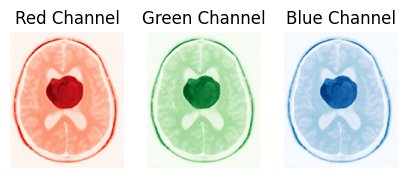

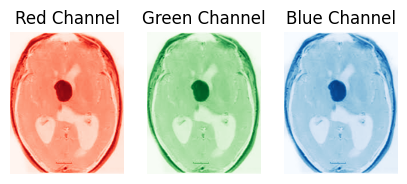

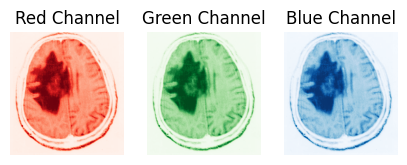

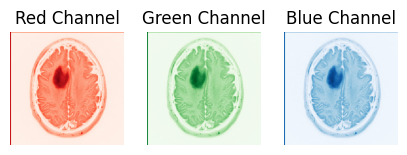

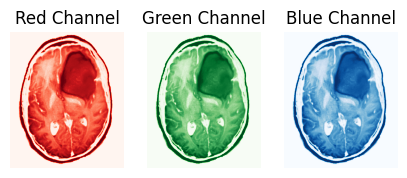

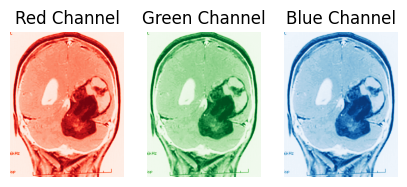

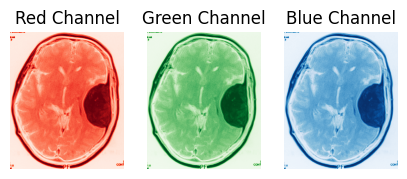

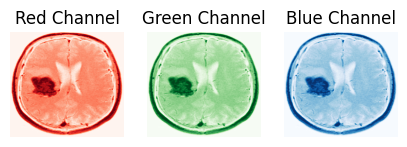

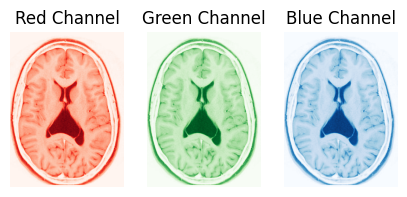

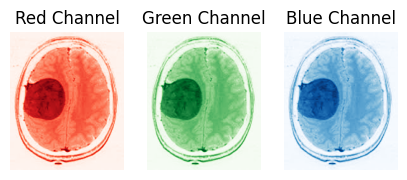

In [ ]:

for i, rgb_image in enumerate(RGB_images): #As i searched the enumerate takes a tuple and
                                                                        #index it's values with the ability to reading it's values by for loop
  # Extract channels (assuming RGB order)
  r_channel = rgb_image[:, :, 0]
  g_channel = rgb_image[:, :, 1]
  b_channel = rgb_image[:, :, 2]

                                        #1 row, 3 columns
  fig, axes = plt.subplots(1, 3, figsize=(5,5))  #We can change the size of the plot above using the figsize() attribute of the figure() function.

                                                                      #The figsize() attribute takes in two parameters — one for the width and the other for the height.
   #Axes  is a tuble object that should be accesed by index
  # Display each channel as an image on its dedicated subplot
  axes[0].imshow(r_channel, cmap='Reds')
  axes[0].set_title('Red Channel')
  axes[0].axis('off')

  axes[1].imshow(g_channel, cmap='Greens')
  axes[1].set_title('Green Channel')
  axes[1].axis('off')
  plt.imshow(b_channel, cmap='Blues')

  axes[2].imshow(b_channel, cmap='Blues')
  axes[2].set_title('Blue Channel')
  axes[2].axis('off')

  # Optional: Add a common title for the entire plot
  #fig.suptitle(f" Image{i+1}")

  # Display the complete plot with subplots arranged vertically
  #plt.tight_layout()  # Adjust layout for better spacing
  plt.show()


## **Resizing the images to 256x256**

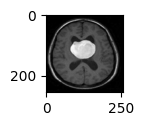

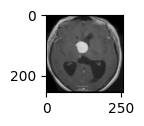

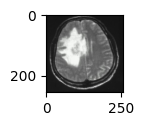

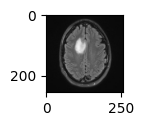

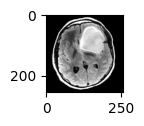

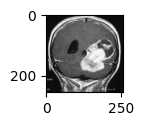

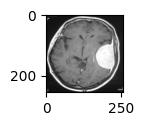

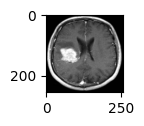

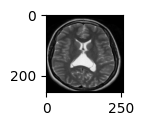

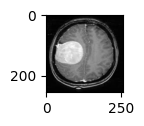

In [ ]:
resized_imges = []
for image in RGB_images:
    width = height = 256
    resized_image = cv2.resize(image , (width, height) , interpolation = cv2.INTER_AREA)
     #What's Interpolation?
    # As I understand it's a process of increasing the size of pixel e
    #which helps in making a digital zoom on image  which may give us more details and features
    #I think it's like making the image a little sharper
    resized_imges.append(resized_image)
    plt.subplots(1, 1, figsize=(1, 1))
    plt.imshow(resized_image)

In [ ]:
for num , photo in enumerate(resized_imges):
    print(f"{num} ---> Dims[0] : {photo.shape[0]}   Dims[1] : {photo.shape[1]}   Dims[2] || Channels : {photo.shape[2]}")

0 ---> Dims[0] : 256   Dims[1] : 256   Dims[2] || Channels : 3
1 ---> Dims[0] : 256   Dims[1] : 256   Dims[2] || Channels : 3
2 ---> Dims[0] : 256   Dims[1] : 256   Dims[2] || Channels : 3
3 ---> Dims[0] : 256   Dims[1] : 256   Dims[2] || Channels : 3
4 ---> Dims[0] : 256   Dims[1] : 256   Dims[2] || Channels : 3
5 ---> Dims[0] : 256   Dims[1] : 256   Dims[2] || Channels : 3
6 ---> Dims[0] : 256   Dims[1] : 256   Dims[2] || Channels : 3
7 ---> Dims[0] : 256   Dims[1] : 256   Dims[2] || Channels : 3
8 ---> Dims[0] : 256   Dims[1] : 256   Dims[2] || Channels : 3
9 ---> Dims[0] : 256   Dims[1] : 256   Dims[2] || Channels : 3


## **Converting 2 Gray then into Binary**

No. of Binary images  --> 10
No. of Grayed images  --> 10


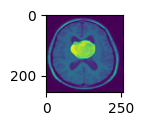

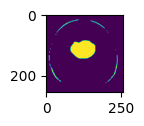

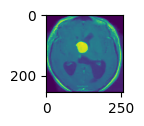

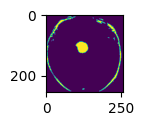

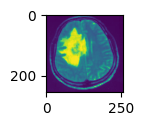

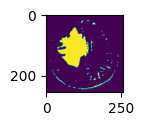

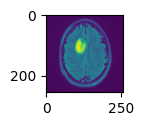

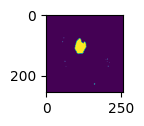

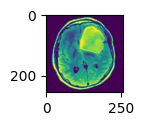

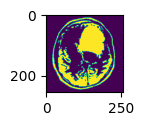

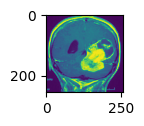

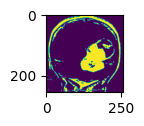

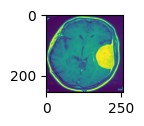

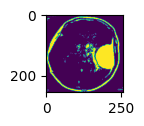

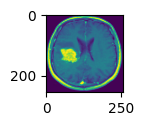

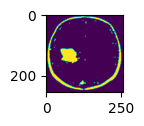

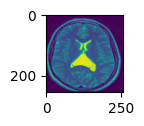

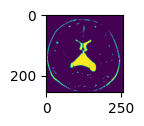

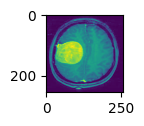

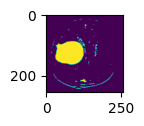

In [ ]:
grayed = []
binarized = []
for num ,  img in enumerate(resized_imges):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.subplots(1, 1, figsize=(1, 1))
    plt.imshow(gray)
    grayed.append(gray)
    ret,thresh = cv2.threshold(gray,150,255,0)
    plt.subplots(1, 1, figsize=(1, 1))
    plt.imshow(thresh)
    binarized.append(thresh)
    #plt.imshow(gray,axes ="off")
print(f"No. of Binary images  --> {len(binarized)}")
print(f"No. of Grayed images  --> {len(grayed)}")

## **Applying Mask into grayscaled Images**

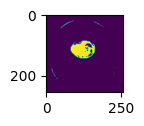

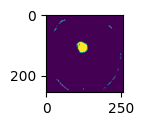

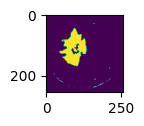

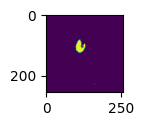

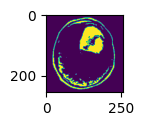

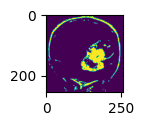

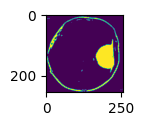

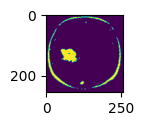

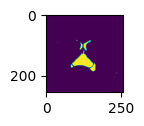

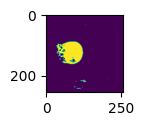

In [ ]:
Masked = []

lower = 200
Upper = 255
for single_grayscaled in grayed:
    mask = cv2.inRange( single_grayscaled , lower , Upper )
    Masked.append(mask)
    plt.subplots(1, 1, figsize=(1, 1))
    plt.imshow(mask)

In [ ]:
X_array = np.array(grayed)
Y_array = np.array(Masked)

In [ ]:
print(f"X_array shape -->   {X_array.shape}")
print(f"Y_array shape -->   {Y_array.shape}")

X_array shape -->   (10, 256, 256)
Y_array shape -->   (10, 256, 256)


## **Cropping Frames of image to crop Tumours Only**




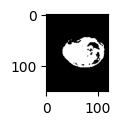

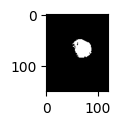

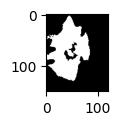

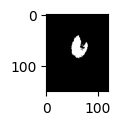

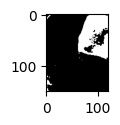

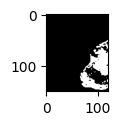

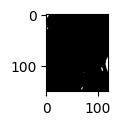

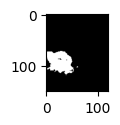

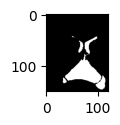

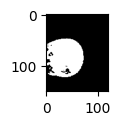

In [ ]:
cropping_frames = []
for mask in Masked:
    cropped = mask[40:190 , 50:170]
    cropping_frames.append(cropped)
    plt.subplots(1 , 1 ,figsize = (1,1) )
    plt.imshow(cropped , cmap = 'gray')

## **Cropping Tumours Only**

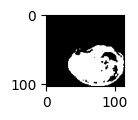

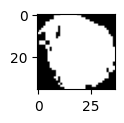

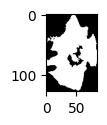

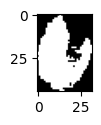

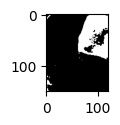

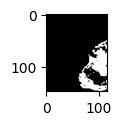

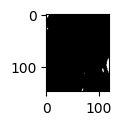

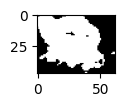

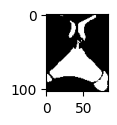

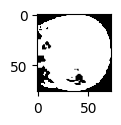

In [ ]:
cropped_tumours = []
threshold = 250
for mask in cropping_frames :
# Apply threshold to create a binary mask
    grayscale_mask = (mask > threshold)

    # Find row and column indices of tumor pixels
    rows, cols = np.where(grayscale_mask == 1)
    row_start, row_end = np.min(rows), np.max(rows) + 1
    col_start, col_end = np.min(cols), np.max(cols) + 1

    # Crop the tumor region
    tumor_crop = mask[row_start : row_end , col_start : col_end]
    cropped_tumours.append(tumor_crop)
    plt.subplots(1 , 1 ,figsize = (1,1) )
    plt.imshow(tumor_crop , cmap = 'gray')

In [ ]:
for num , photo in enumerate(grayed):
    print(f"{num} ---> Dims[0] : {photo.shape[0]}   Dims[1] : {photo.shape[1]}")  # Dims[2] || Channels : {photo.shape[2]})

0 ---> Dims[0] : 256   Dims[1] : 256
1 ---> Dims[0] : 256   Dims[1] : 256
2 ---> Dims[0] : 256   Dims[1] : 256
3 ---> Dims[0] : 256   Dims[1] : 256
4 ---> Dims[0] : 256   Dims[1] : 256
5 ---> Dims[0] : 256   Dims[1] : 256
6 ---> Dims[0] : 256   Dims[1] : 256
7 ---> Dims[0] : 256   Dims[1] : 256
8 ---> Dims[0] : 256   Dims[1] : 256
9 ---> Dims[0] : 256   Dims[1] : 256


## **Cropping the images into 4 parts**

128


<ipython-input-42-cfe307a02b92>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots(1, 1, figsize=(1, 1))


No. Of Cropped Pieces --> 40

No. Of Gray  Images --> 10



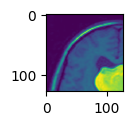

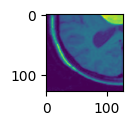

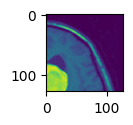

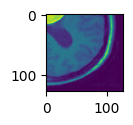

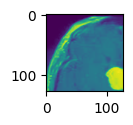

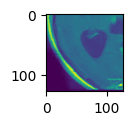

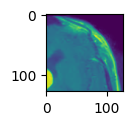

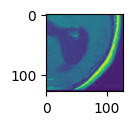

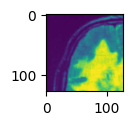

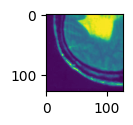

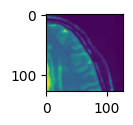

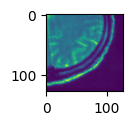

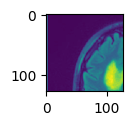

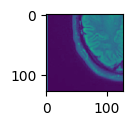

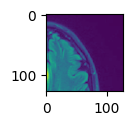

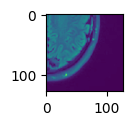

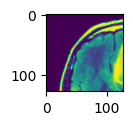

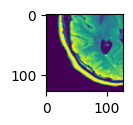

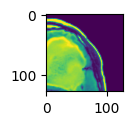

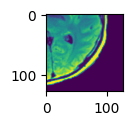

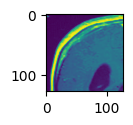

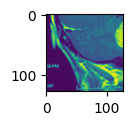

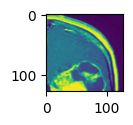

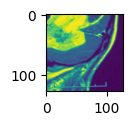

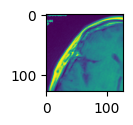

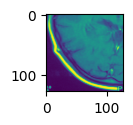

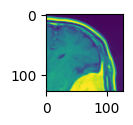

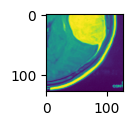

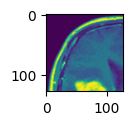

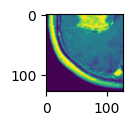

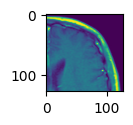

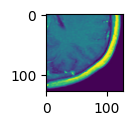

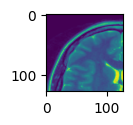

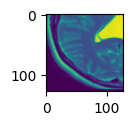

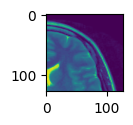

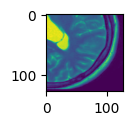

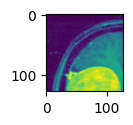

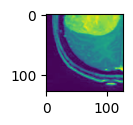

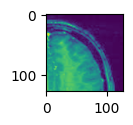

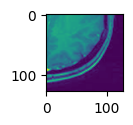

In [ ]:
crops = []
x = 0
y = 0
dims = dimsy =grayed[0].shape[0]//2
print(dims)

for num , img in enumerate(grayed):
        for x in range(0,img.shape[0],128): #To make sure that i will remember we will move 2 steps in x-axis and y-axis and each step is by 128 pixel = the 1/4 of 2D image
            for y in range(0,img.shape[1],128): #   img.shape[0] = img.shape[1] = 256
                crop_img = img[y:y+dims, x:x+dims]
                crops.append(crop_img)
                plt.subplots(1, 1, figsize=(1, 1))
                plt.imshow(crop_img)
#axes[0].axis('off')    Why it's not working?!
#axes[1].axis('off')     Why it's not working?!
print(f"No. Of Cropped Pieces --> {len(crops)}\n")
print(f"No. Of Gray  Images --> {len(grayed)}\n")

#Saving images into Manually Augmented images directory
for num , single_image in enumerate(crops):
    with  open(f"{Manual_Augmented_Dir}/cropped{num}.png" , 'w') as f :
        f.write(f"cropped{num}.png")


## **Flipping The images (The Cropped Ones and Binary Ones)(Swapping The matrix single voxel aroud  y-axis)**

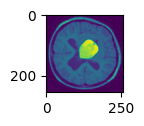

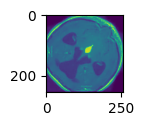

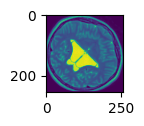

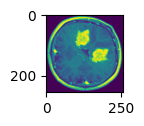

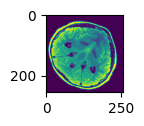

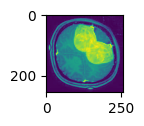

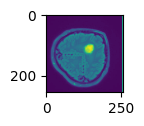

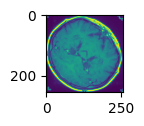

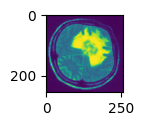

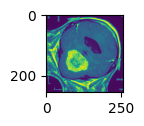

In [ ]:
flipped = []
for num ,  imagef in enumerate(grayed):
        flip = imagef[    :   ,  :: -1  ] #Testing it below on nums  --------> After Searching i found that this is a slicing technique  that flips the image
                                                #According to the location of column(:)
                                                #if [     :     , ::-1]   swapping over x_axis nums fliping their real values not their indecies #Flipping columns
                                                #if [      ::-1    , :]   swapping over y_axis nums fliping their real values not their indecies #Flipping rows
        flipped.append(flip)
        plt.subplots(1, 1, figsize=(1, 1))
        plt.imshow(flip)
#plt.imshow(image)

#Saving images into Manually Augmented images directory
for num , single_image in enumerate(flipped):
    with  open(f"{Manual_Augmented_Dir}/flipped{num}.png" , 'w') as f :
        f.write(f"flipped{num}.png")

## **Rotating Original gray_scaled images by 90 Degree**

### **After Searching I found that I need to use rotation matrix for this linear transformation**

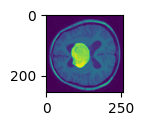

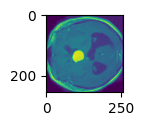

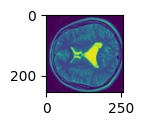

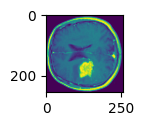

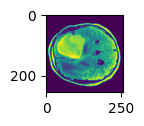

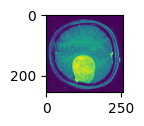

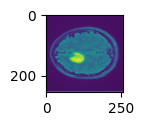

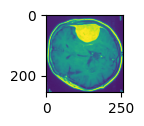

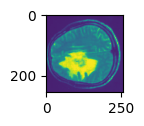

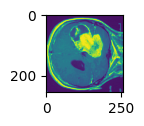

In [ ]:
rotates = []
angle_in_degrees = 90
for num , imag_r in enumerate(grayed):
    height, width = imag_r.shape[:2]
    center = (width // 2, height // 2)  # Rotation center (image center) ----> ( x  ,  y )
    rotation_matrix = cv2.getRotationMatrix2D(center, angle_in_degrees, 1)  # Create rotation matrix
    rotated_image = cv2.warpAffine(imag_r, rotation_matrix, (width, height))  # Apply rotation
    rotates.append(rotated_image)
    cv2.imwrite(f"{Manual_Augmented_Dir}/Rotated{num}.jpeg",rotated_image) #writing them in Manually_Augmented dir
    plt.subplots(1, 1, figsize=(1, 1))
    plt.imshow(rotated_image)


In [ ]:
#Get Rotation Matrix function content  for more understanding :
theta = np.radians(90)
c , s =np.cos(theta) , np.sin(theta)
rotated = np.array(((c,-s),(s,c)))

## **Another Approach of 90 Degree Rotation by making a transpose then a Flip (It's Easier and I made it After some Re-thinking)**

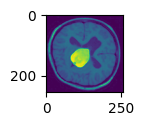

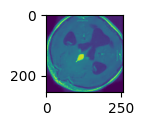

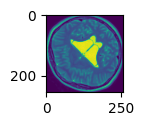

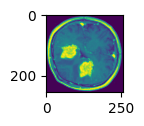

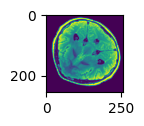

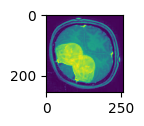

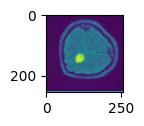

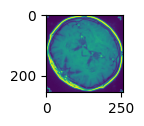

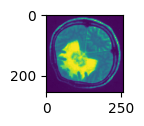

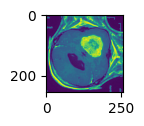

In [ ]:
rotated_by_transpose = []
for num , imag_r in enumerate(grayed):
    x=imag_r.transpose() #Getting the transpose of the single image
# ############VIP NOTE########## I Can make the transpose function
#easily but I wanted to leave a clean code and cell
    rotated_image = x[    ::  -1  ,  : ] #swapping over y_axis nums fliping their real values not their indecies #Flipping rows
    rotated_by_transpose.append(rotated_image)
    plt.subplots(1, 1, figsize=(1, 1))
    plt.imshow(rotated_image)


#Saving images into Manually Augmented images directory
for num , single_image in enumerate(rotated_by_transpose):
    with  open(f"{Manual_Augmented_Dir}/rotated{num}.png" , 'w') as f :
        f.write(f"rotated{num}.png")


## **Accidentaly Genetrated a rotation of 45 Degree  with a mirror between 2 sides of the image while trying to transpose**

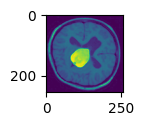

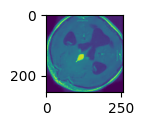

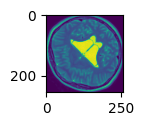

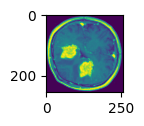

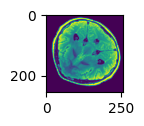

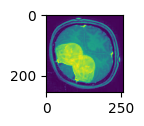

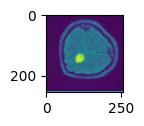

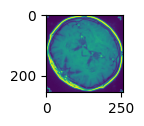

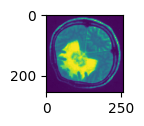

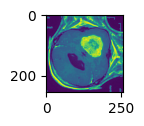

In [ ]:
rotated_45_mirrored = []
images = []
for num , imag_r in enumerate(grayed):
    for x in range(imag_r.shape[0]):
        for y in range(imag_r.shape[1]):
           # temp = imag_r[x] [y]
            imag_r[x][y] = imag_r[y][x]
            #imag_r[y][x] = temp
    rotated_image = imag_r[      ::  -1 ,:  ] #swapping over y_axis nums fliping their real values not their indecies #Flipping rows
    rotated_45_mirrored.append(rotated_image)
    axes = plt.subplots(1, 1, figsize=(1, 1))
    plt.imshow(rotated_image)


#Saving images into Manually Augmented images directory
for num , single_image in enumerate(rotated_45_mirrored):
    with  open(f"{Manual_Augmented_Dir}/rotated_mirrored{num}.png" , 'w') as f :
        f.write(f"rotated_mirrored{num}.png")

## **Not Working Successfully Manual Rotation 3rd Approach**

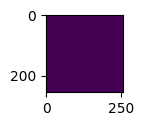

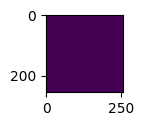

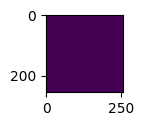

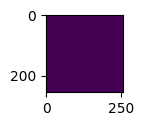

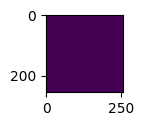

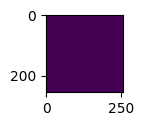

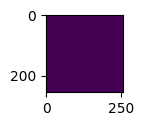

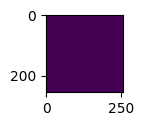

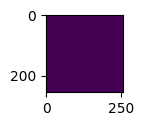

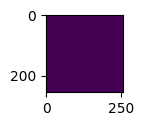

In [ ]:
images = []

for num , imag_r in enumerate(grayed):
    for x in range(imag_r.shape[0]):
        for y in range(imag_r.shape[1]):
            transposed_image = np.zeros((imag_r.shape[0],imag_r.shape[1]))
            transposed_image[x][y] = imag_r [y][x]

    rotated_image = transposed_image[      ::  -1 ,:  ] #swapping over y_axis nums fliping their real values not their indecies #Flipping rows
    images.append(rotated_image)
    plt.subplots(1, 1, figsize=(1, 1))
    plt.imshow(rotated_image)

# **Finally Saving Augmened Manually Files Locally**

In [ ]:
!zip -r /content/Augmented_Manuallyr.zip    /content/Augmented_Manually

  adding: content/Augmented_Manually/ (stored 0%)
  adding: content/Augmented_Manually/cropped20.png (stored 0%)
  adding: content/Augmented_Manually/rotated4.png (stored 0%)
  adding: content/Augmented_Manually/cropped36.png (stored 0%)
  adding: content/Augmented_Manually/Cropped4.jpeg (deflated 1%)
  adding: content/Augmented_Manually/rotated7.png (stored 0%)
  adding: content/Augmented_Manually/rotated_mirrored0.png (stored 0%)
  adding: content/Augmented_Manually/cropped14.png (stored 0%)
  adding: content/Augmented_Manually/cropped38.png (stored 0%)
  adding: content/Augmented_Manually/flipped7.png (stored 0%)
  adding: content/Augmented_Manually/flipped9.png (stored 0%)
  adding: content/Augmented_Manually/cropped3.png (stored 0%)
  adding: content/Augmented_Manually/Cropped2.jpeg (deflated 0%)
  adding: content/Augmented_Manually/cropped11.png (stored 0%)
  adding: content/Augmented_Manually/cropped28.png (stored 0%)
  adding: content/Augmented_Manually/rotated_mirrored7.png (s

In [ ]:
from google.colab import files
files.download("/content/Augmented_Manuallyr.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Note: The most of my previous procedures were Applied on binarized images but after reconsidering the machine learning process that needs alot of features for classification  ---> I re-used Gray_Scale**

# **Another Approach of Data Augmentation**

## **Exporting the original working only grayscaled images for applying data augmentation faster technique**

In [ ]:
!pip install Augmentor

In [ ]:
import Augmentor

In [ ]:
!mkdir '/content/Augmented_By_Augmenter'

In [ ]:
for num ,  image in enumerate(image_paths):

    img = cv2.imread(image)

    if img is  None :  #None is common for indicating missing values, other languages might use different mechanisms.
                                     #In Python  None = absence of data.
        continue #Skip

    else:
        image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_grascale =  cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
        cv2.imwrite(f"/content/Augmented_By_Augmenter/{(num)}.jpeg", image_grascale)


In [ ]:
 p = Augmentor.Pipeline("/content/Augmented_By_Augmenter")

Initialised with 10 image(s) found.
Output directory set to /content/Augmented_By_Augmenter/output.

In [ ]:
p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.6)
p.crop_by_size(probability=1,width = 256 , height = 256 , centre= True)
p.flip_left_right(probability=1)
p.sample(100)
#p.process()    #Alot of errors

Processing <PIL.Image.Image image mode=L size=256x256 at 0x7DAAF4444970>:   7%|▋         | 7/100 [00:00<00:10,  9.05 Samples/s]


ValueError: empty range for randrange() (0, -54, -54)

In [ ]:
rm -rf "/content/Original_Gray_Scaled/output"

In [ ]:
!zip -r /content/Augmented_By_Augmenter.zip    /content/Augmented_By_Augmenter

In [ ]:
from google.colab import files
files.download("/content/Augmented_By_Augmenter.zip")

# **Trying Another Approach of Data Augmentation Using Keras (Needs More Explaination and Practice)**

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
import keras

In [ ]:
model = keras.Sequential([
  # Add the preprocessing layers you created earlier.
  # Add the model layers
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
  layers.Resizing(256, 256)
])

In [ ]:
augmentation_function = [(model(x)) for x in (RGB_images)] #I tried using grayed photos but it didn't accept it bec. it needed 3 - Dimenesional photos
print(len(augmentation_function))
#Not Working Successfully

10


# **Sub-Field**

## **Failed Or In_Complete Tests Field**

In [ ]:
arry = np.arange(3)
flipped = arry [    :: -1 ]
print(arry)
print(flipped)

In [ ]:
arry2 = np.arange(10)
new_arry2_shape = arry2.reshape(2,5)
print("____________________________________________________________________")
print(new_arry2_shape)
print("____________________________________________________________________")
print(new_arry2_shape [    :: -1 ,: ]) #Flipping rows
print("____________________________________________________________________")
print(new_arry2_shape [ :,   :: -1 ]) #Flipping columns
print("____________________________________________________________________")
x = new_arry2_shape.transpose()
print(x[    ::-1   ,  :])

____________________________________________________________________
[[0 1 2 3 4]
 [5 6 7 8 9]]
____________________________________________________________________
[[5 6 7 8 9]
 [0 1 2 3 4]]
____________________________________________________________________
[[4 3 2 1 0]
 [9 8 7 6 5]]
____________________________________________________________________
[[4 9]
 [3 8]
 [2 7]
 [1 6]
 [0 5]]


In [ ]:
for num, image_s in enumerate(grayed):
    image_p =  str(image_s)
    img = cv2.imread(image_p,cv2.IMREAD_GRAYSCALE) # Load the image
    if image is not None :
        cv2.imwrite(f"/content/Original_Gray_Scaled/{(num)}.jpeg", img) # Save the image

#Not Working

In [ ]:
for img in enumerate(grayed):
    theta = np.radians(90)
    c , s =np.cos(theta) , np.sin(theta)
    rotated = np.array(((c,-s),(s,c)))
    axes = plt.subplots(1, 1, figsize=(1, 1))
    plt.imshow(rotated)

In [ ]:
count = 0
for rgb_image in RGB_images :
    count +=1
    r_channel = rgb_image[:, :, 0]

    plt.subplot(1,3, 3)
    g_channel = rgb_image[:, :, 1]

    plt.subplot(1,3, 3)
    b_channel = rgb_image[:, :, 2]

    plt.subplot(1,3 ,3)
    plt.imshow(r_channel)
plt.show()


In [ ]:
for image in RGB_images:
    IMG_SIZE = 256

    resize = keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE)
    ])

    result = resize(image)
    axes = plt.subplots(1, 1, figsize=(1, 1))
    plt.axis('off')
    plt.imshow(result)

In [ ]:
images = []
for index_of_imgae in range(1,12):
    if
    #print(f"{index_of_imgae} : {image.shape}")
    image =cv2.imread(f"/content/Their_Folder/Y{str(index_of_imgae)}.jpg")
    if image is not None :
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #grayed = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    images.append((image))
#for image in images:

    #print('Image Width is',image.shape[1])

In [ ]:
for frame in range(len(images)):
        #image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(frame.shape)
        #Red_Channel = frame[:,:,0]
        #plt.subplot(3,3,1)
        print(np.shape(frame))
        #plt.imshow()

### **Another Approach**

In [ ]:
for path in os.listdir("/content/Their_Folder"):
    image = mpimg.imread(str(path))
    #Red_Channel = image[:,:,1]
    #plt.subplot(3,3,1)
    plt.imshow(image)

### **Another Approach**

In [ ]:
for img in glob.iglob("/content/Their_Folder/*.png"):
    cv_img = cv2.imread(img)
    plt.subplot(3,3,1)
    plt.imshow(cv_img)
plt.show()